In [ ]:
"""

Proyecto Data Science II: Evaluación del Riesgo Crediticio Utilizando Aprendizaje Automático
Maritza Quintero Siritt

Resumen
El proyecto se centra en analizar datos históricos sobre préstamos, incluyendo información sobre el género del prestatario, 
el propósito y tipo del préstamo, y características financieras relevantes. El objetivo es desarrollar un modelo predictivo utilizando técnicas 
de Aprendizaje Automático para evaluar la probabilidad de incumplimiento de préstamos. Este análisis ayudará a las instituciones financieras a 
mitigar los riesgos asociados con la concesión de préstamos, optimizar su cartera y reducir la tasa de incumplimiento, mejorando la toma de decisiones 
financieras informadas.

Objetivo del Proyecto
El objetivo principal del proyecto es desarrollar un modelo de Aprendizaje Automático que pueda predecir con alta precisión si un préstamo será pagado 
o incumplido. Esto permitirá a las instituciones financieras evaluar mejor el riesgo crediticio, reducir pérdidas asociadas con préstamos incobrables 
y tomar decisiones más informadas sobre la concesión de créditos.

Contexto Comercial
La concesión de préstamos es una fuente clave de ingresos para las instituciones financieras, pero también conlleva un riesgo significativo: el 
incumplimiento de pagos por parte de los prestatarios. La gestión del riesgo crediticio es crucial para la rentabilidad y estabilidad de las 
instituciones prestamistas. Mediante el desarrollo de un modelo predictivo basado en datos históricos de prestatarios y características de los 
préstamos, se espera mejorar la capacidad de las instituciones para identificar riesgos antes de la aprobación del préstamo, optimizar su cartera y 
reducir la tasa de incumplimiento, lo cual fortalece la confianza de los inversores y los clientes.

Hipótesis a Responder
Se plantea que, al analizar los atributos de los préstamos, tales como el monto, tipo, propósito del préstamo, y la solvencia crediticia del prestatario,
junto con otros factores relevantes, se podrá desarrollar un modelo de Aprendizaje Automático capaz de predecir con alta precisión si un prestatario 
incumplirá con su préstamo. Este modelo proporcionará información valiosa para la toma de decisiones estratégicas, mejorando la capacidad de la 
institución financiera para evaluar la rentabilidad y el riesgo crediticio de manera más eficiente.

Las variables relevantes para el riesgo incluyen el "Status" del préstamo, que indica si un préstamo ha sido pagado puntualmente (1) o ha entrado en 
incumplimiento (0). El análisis de esta variable permitirá al modelo centrarse en los factores que determinan el cumplimiento o el incumplimiento, 
proporcionando así un enfoque sólido para la mitigación del riesgo crediticio.


Fuente de datos: https://www.kaggle.com/datasets/yasserh/loan-default-dataset

"""


In [ ]:
#Conexión con Kaggle mediante API

In [2]:
!pip install kaggle

In [3]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

In [4]:
# Verificar si el archivo existe en la ruta
kaggle_json_path = os.path.join(os.getcwd(), 'kaggle.json')
if os.path.exists(kaggle_json_path):     
 print(f"Archivo kaggle.json encontrado en: {kaggle_json_path}")
else:     
 print("No se encontró el archivo kaggle.json en el directorio actual.")

Archivo kaggle.json encontrado en: C:\Users\Mary Siritt\Phyton CoderHouse\kaggle.json


In [5]:
# Configura la variable de entorno para que apunte a la carpeta donde está el archivo kaggle.json
os.environ['KAGGLE_CONFIG_DIR'] = r"C:\Users\Mary Siritt\Phyton CoderHouse"
 
# Inicializa la API y autentica
api = KaggleApi()
api.authenticate()
 
# Definir el dataset que quieres descargar (puedes ajustar esto según el dataset que quieras)
dataset = 'yasserh/loan-default-dataset'
 
# Definir el directorio de descarga de los archivos
download_path = r"C:\Users\Mary Siritt\Phyton CoderHouse"
 
# Crear la carpeta de descarga si no existe
os.makedirs(download_path, exist_ok=True)
 
# Descargar el dataset y descomprimirlo
api.dataset_download_files(dataset, path=download_path, unzip=True)
 
# Verificar los archivos descargados
print("Archivos descargados:", os.listdir(download_path))

Dataset URL: https://www.kaggle.com/datasets/yasserh/loan-default-dataset
Archivos descargados: ['.git', '.ipynb_checkpoints', 'kaggle.json', 'Loan_Default.csv', 'Loan_Default.rar', 'Maritza_Quintero.ipynb', 'ProyectoDS_Parte1_QuinteroSiritt.ipynb', 'ProyectoDS_Parte2_QuinteroSiritt.ipynb', 'Untitled.ipynb']


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Descargar el conjunto de datos
api.dataset_download_files(dataset, path=download_path, unzip=True)
 
# Verificar el contenido del directorio de descarga
print("Archivos descargados:", os.listdir(download_path))
 
# Cargar el archivo
csv_file_path = os.path.join(download_path, 'Loan_Default.csv')
 
# Cargar el conjunto de datos en un DataFrame
df_loan = pd.read_csv(csv_file_path)
 
# Mostrar las primeras filas del DataFrame
print(df_loan.head())

Dataset URL: https://www.kaggle.com/datasets/yasserh/loan-default-dataset
Archivos descargados: ['.git', '.ipynb_checkpoints', 'kaggle.json', 'Loan_Default.csv', 'Loan_Default.rar', 'Maritza_Quintero.ipynb', 'ProyectoDS_Parte1_QuinteroSiritt.ipynb', 'ProyectoDS_Parte2_QuinteroSiritt.ipynb', 'Untitled.ipynb']
      ID  year loan_limit             Gender approv_in_adv loan_type  \
0  24890  2019         cf  Sex Not Available         nopre     type1   
1  24891  2019         cf               Male         nopre     type2   
2  24892  2019         cf               Male           pre     type1   
3  24893  2019         cf               Male         nopre     type1   
4  24894  2019         cf              Joint           pre     type1   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
0           p1                l1        nopc                  nob/c  ...   
1           p1                l1        nopc                    b/c  ...   
2           p1               

In [ ]:
#Exploración de datos

In [8]:
#Información general del DataFrame
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [ ]:
#El dataset muestra pocos valores nulos en las columnas, una mezcla de datos numéricos y categóricos, lo cual 
#requerirá diferentes técnicas de preprocesamiento, como la codificación de variables categóricas.

In [9]:
# Resumen estadístico
df_loan.describe()

ID      year   loan_amount  rate_of_interest  \
count  148670.000000  148670.0  1.486700e+05     112231.000000   
mean    99224.500000    2019.0  3.311177e+05          4.045476   
std     42917.476598       0.0  1.839093e+05          0.561391   
min     24890.000000    2019.0  1.650000e+04          0.000000   
25%     62057.250000    2019.0  1.965000e+05          3.625000   
50%     99224.500000    2019.0  2.965000e+05          3.990000   
75%    136391.750000    2019.0  4.365000e+05          4.375000   
max    173559.000000    2019.0  3.576500e+06          8.000000   

       Interest_rate_spread  Upfront_charges           term  property_value  \
count         112031.000000    109028.000000  148629.000000    1.335720e+05   
mean               0.441656      3224.996127     335.136582    4.978935e+05   
std                0.513043      3251.121510      58.409084    3.599353e+05   
min               -3.638000         0.000000      96.000000    8.000000e+03   
25%                0.076000       581.490000     360.000000    2.680000e+05   
50%                0.390400      2596.450000     360.000000    4.180000e+05   
75%                0.775400      4812.500000     360.000000    6.280000e+05   
max                3.357000     60000.000000     360.000000    1.650800e+07   

              income   Credit_Score            LTV         Status  \
count  139520.000000  148670.000000  133572.000000  148670.000000   
mean     6957.338876     699.789103      72.746457       0.246445   
std      6496.586382     115.875857      39.967603       0.430942   
min         0.000000     500.000000       0.967478       0.000000   
25%      3720.000000     599.000000      60.474860       0.000000   
50%      5760.000000     699.000000      75.135870       0.000000   
75%      8520.000000     800.000000      86.184211       0.000000   
max    578580.000000     900.000000    7831.250000       1.000000   

               dtir1  
count  124549.000000  
mean       37.732932  
std        10.545435  
min         5.000000  
25%        31.000000  
50%        39.000000  
75%        45.000000  
max        61.000000

In [ ]:
# Las medias y desviaciones estándar proporcionan una idea de la tendencia central y la dispersión de los datos, 
# los cuales serán útiles para la normalización y estandarización de variables durante el preprocesamiento.

In [10]:
# Verificar la cantidad de datos en el DataFrame
total_entries = df_loan.shape[0]
print("Total de entradas en el DataFrame:", total_entries)

Total de entradas en el DataFrame: 148670


In [ ]:
#El DataFrame: 148,670 tiene filas de datos

In [11]:
# Verificar duplicados en el DataFrame
duplicate_entries = df_loan.duplicated().sum()
print("Número de entradas duplicadas:", duplicate_entries)

Número de entradas duplicadas: 0


In [ ]:
#No se encontraron duplicados.
#Se considera positivo debido a que los duplicados pueden distorsionar el análisis y los resultados del modelo.

In [12]:
# Obtener los nombres de las columnas
column_names = df_loan.columns
print("Nombres de las columnas:", column_names)

Nombres de las columnas: Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')


In [ ]:
#El conjunto de datos contiene varias columnas relacionadas con préstamos, como detalles del préstamo, demografía del prestatario, 
#puntajes de crédito y estados del préstamo. Aquí hay una breve descripción de las columnas y los datos que contienen:

#1.	ID: Identificador único para cada préstamo.
#2.	year: Año de la solicitud de préstamo.
#3.	loan_limit: Categoría del límite del préstamo.
#4.	Gender: Género del solicitante.
#5.	approv_in_adv: Indica si el préstamo fue preaprobado.
#6.	loan_type: Tipo de préstamo.
#7.	loan_purpose: Propósito del préstamo.
#8.	Credit_Worthiness: Categoría de solvencia crediticia.
#9.	open_credit: Estado de crédito abierto.
#10. business_or_commercial: Indica si el préstamo es para fines comerciales o de negocio.
#11. loan_amount: Monto del préstamo.
#12. rate_of_interest: Tasa de interés.
#13. Interest_rate_spread: Diferencial de la tasa de interés.
#14. Upfront_charges: Cargos iniciales.
#15. term: Plazo del préstamo en meses.
#16. Neg_ammortization: Indica si hay amortización negativa.
#17. interest_only: Indica si es solo interés.
#18. lump_sum_payment: Indica si hay pago de suma global.
#19. property_value: Valor de la propiedad.
#20. construction_type: Tipo de construcción.
#21. occupancy_type: Tipo de ocupación.
#22. Secured_by: Garantía del préstamo.
#23. total_units: Unidades totales.
#24. income: Ingreso del solicitante.
#25. credit_type: Tipo de crédito.
#26. Credit_Score: Puntaje de crédito del solicitante.
#27. co-applicant_credit_type: Tipo de crédito del co-solicitante.
#28. age: Rango de edad del solicitante.
#29. submission_of_application: Tipo de presentación de la solicitud.
#30. LTV: Relación préstamo-valor (Loan-to-Value ratio).
#31. Region: Región del solicitante.
#32. Security_Type: Tipo de garantía del préstamo.
#33. Status: Estado del préstamo (por ejemplo, incumplido o no).
#34. dtir1: Relación deuda-ingreso (Debt-to-Income ratio).

#Cada columna contiene datos que describen diferentes aspectos del préstamo y del solicitante, permitiendo un análisis integral para evaluar riesgos 
#y tomar decisiones financieras.

In [ ]:
#Visualización de la distribución de variables clave

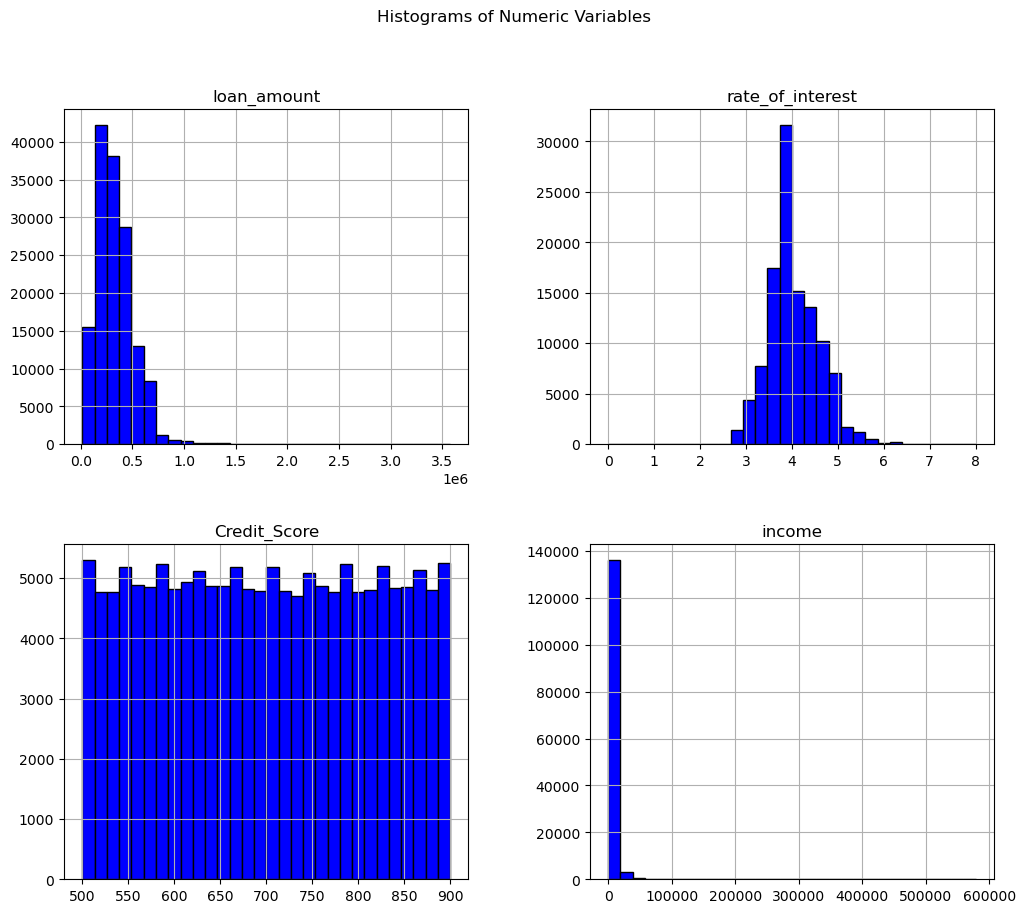

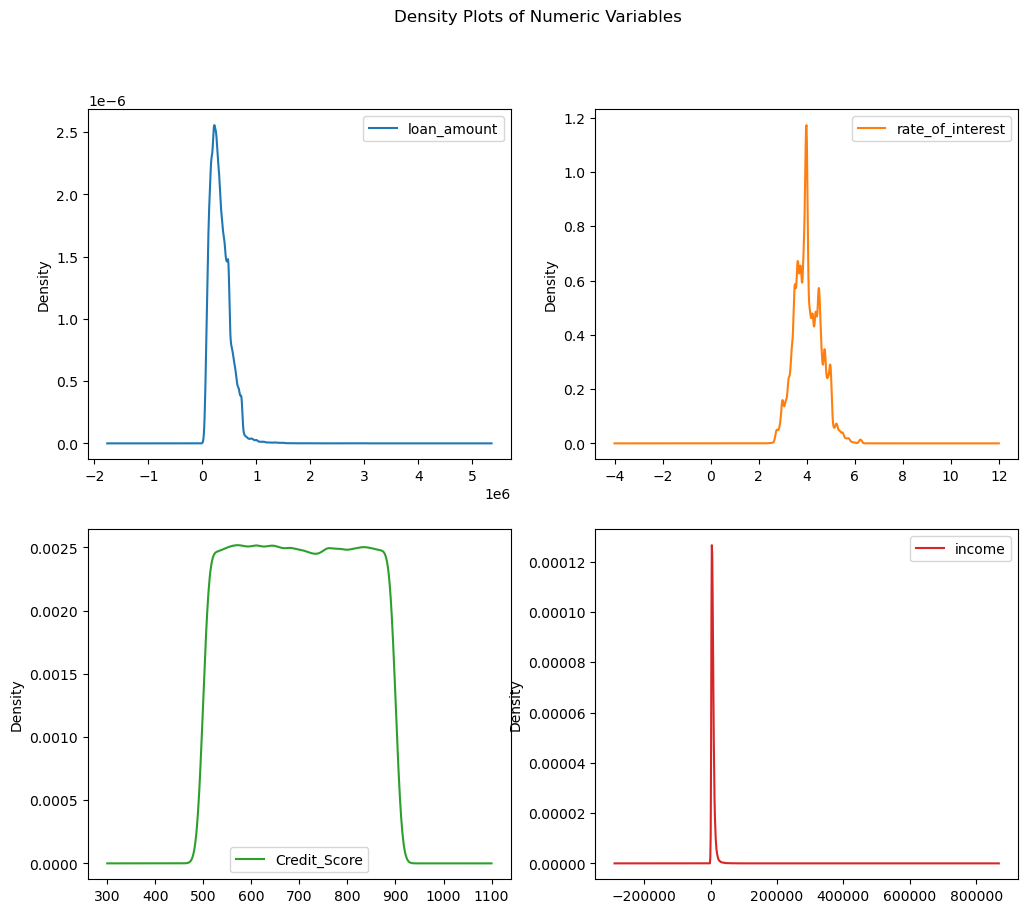

In [13]:
#Variables numéricas para visualizar
numeric_columns = ['loan_amount', 'rate_of_interest', 'Credit_Score', 'income']

#Histogramas
df_loan[numeric_columns].hist(bins=30, figsize=(12, 10), color='blue', edgecolor='black')
plt.suptitle('Histograms of Numeric Variables')
plt.show()

#Gráficos de densidad
df_loan[numeric_columns].plot(kind='density', subplots=True, layout=(2, 2), sharex=False, figsize=(12, 10))
plt.suptitle('Density Plots of Numeric Variables')
plt.show()

In [ ]:
#loan_amount: En su histograma, muestra que la mayoría de los préstamos están por debajo de $500,000. La distribución está 
#sesgada a la derecha, lo que sugiere que aunque la mayoría de los préstamos son relativamente pequeños, hay algunos préstamos 
#grandes que influyen en la media. Y en su gráfico de densidad, la distribución está sesgada a la derecha, similar a lo observado 
#en el histograma.

#rate_of_interest: Muestra en su histograma, La distribución es aproximadamente normal con un pico claro, 
#lo que indica que las tasas de interés suelen centrarse en torno al 4%. Con un gráfico de densidad aunque hay un pico 
#alrededor del 4%, la densidad muestra variabilidad. Esto puede ser debido a datos más detallados en ciertas regiones de tasas de interés.

#Credit_Score: Tiene un histograma, donde la mayoría no hay un pico claro en la distribución, lo que sugiere que los puntajes 
#de crédito están distribuidos de manera bastante uniforme dentro de este rango.
#Muestra en su gráfico de densidad, una confirmacion de la observación del histograma de que los puntajes de crédito están distribuidos 
#de manera uniforme en este rango.

#income: Su histograma, indica que la distribución está fuertemente sesgada a la derecha, indicando que la mayoría de los 
#prestatarios tienen ingresos relativamente bajos, pero hay algunos con ingresos extremadamente altos. Y en su gráfico de densidad, 
#la distribución está fuertemente sesgada a la derecha, similar a lo observado en el histograma.

In [ ]:
#Análisis de correlación

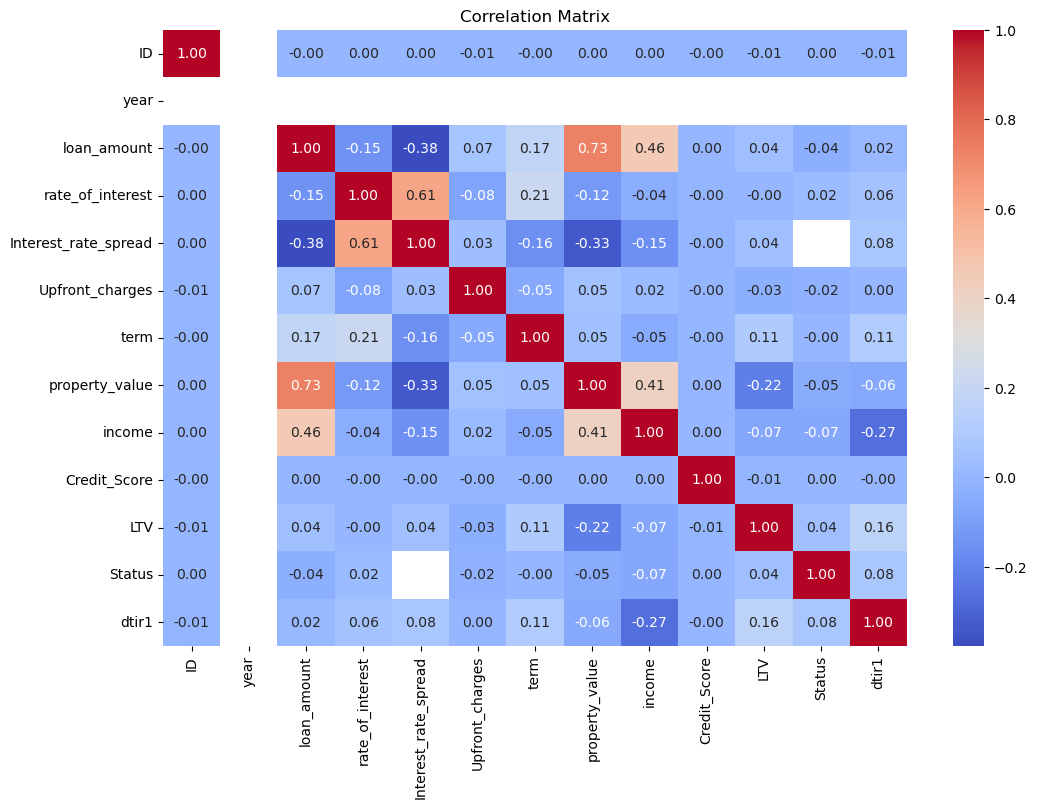

In [14]:
# Seleccionar solo las columnas numéricas
numeric_columns = df_loan.select_dtypes(include=['float64', 'int64']).columns

# Calcular la matriz de correlación
correlation_matrix = df_loan[numeric_columns].corr()

# Visualización de la matriz de correlación usando un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#La fuerte relación positiva entre loan_amount y property_value sugiere que el valor de la propiedad es un factor importante para 
#determinar el monto del préstamo. La relación entre rate_of_interest y Interest_rate_spread indica que a medida que aumenta la tasa 
#de interés, la variabilidad en la tasa también aumenta. Las relaciones moderadas entre loan_amount e income, así como entre property_value 
#e income, sugieren que los ingresos son un factor relevante, aunque no determinante, para el valor del préstamo y de la propiedad.
#La falta de una fuerte correlación lineal entre Status y las demás variables indica que la predicción de la variable objetivo puede 
#requerir un enfoque más completo.

In [ ]:
#Identificación de valores atípicos

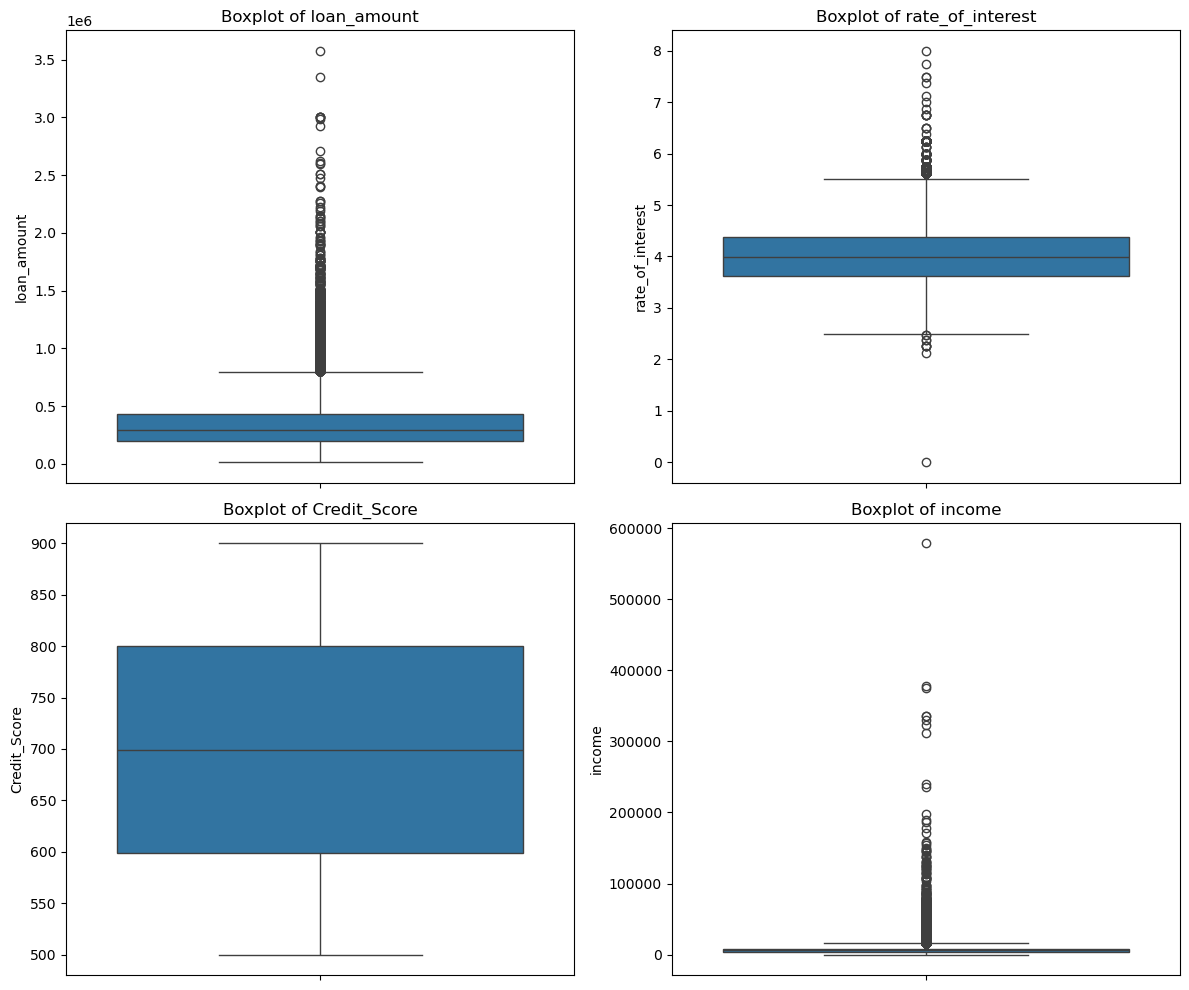

In [15]:
import math

# Seleccionar solo las columnas numéricas relevantes
numeric_columns = ['loan_amount', 'rate_of_interest', 'Credit_Score', 'income']

# Calcular el número de filas y columnas para los subplots
num_cols = len(numeric_columns)
num_rows = math.ceil(num_cols / 2)

# Boxplots para identificar valores atípicos
plt.figure(figsize=(12, num_rows * 5))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(df_loan[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
#loan_amount: Los valores atípicos indican que aunque la mayoría de los préstamos son relativamente pequeños, hay unos pocos préstamos 
#significativamente grandes que podrían influir en la media y otras estadísticas.
#rate_of_interest: Los valores atípicos en las tasas de interés sugieren que hay algunas tasas de interés inusualmente altas y bajas 
#que podrían ser el resultado de políticas de préstamos específicas o errores en los datos.
#Credit_Score: La distribución del puntaje de crédito es bastante uniforme, sin valores atípicos significativos que deban ser abordados.
#income:Los valores atípicos en los ingresos indican que aunque la mayoría de los prestatarios tienen ingresos relativamente bajos, 
#hay algunos con ingresos extremadamente altos que podrían influir en la media y otras estadísticas.

In [ ]:
#Preprocesamiento de datos

In [ ]:
#Manejo de Valores Nulos
#Se imputan los valores nulos en columnas numéricas usando la media y en columnas categóricas usando la moda.

In [16]:
# Verificar valores nulos en cada columna
missing_values = df_loan.isnull().sum()
print(missing_values[missing_values > 0])

# Imputar valores nulos (ejemplo: usando la media para columnas numéricas)
df_loan['loan_limit'] = df_loan['loan_limit'].fillna(df_loan['loan_limit'].mode()[0])
df_loan['approv_in_adv'] = df_loan['approv_in_adv'].fillna(df_loan['approv_in_adv'].mode()[0])
df_loan['rate_of_interest'] = df_loan['rate_of_interest'].fillna(df_loan['rate_of_interest'].mean())
df_loan['Interest_rate_spread'] = df_loan['Interest_rate_spread'].fillna(df_loan['Interest_rate_spread'].mean())
df_loan['Upfront_charges'] = df_loan['Upfront_charges'].fillna(df_loan['Upfront_charges'].mean())
df_loan['property_value'] = df_loan['property_value'].fillna(df_loan['property_value'].mean())
df_loan['income'] = df_loan['income'].fillna(df_loan['income'].mean())
df_loan['dtir1'] = df_loan['dtir1'].fillna(df_loan['dtir1'].mean())

loan_limit                    3344
approv_in_adv                  908
loan_purpose                   134
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
property_value               15098
income                        9150
age                            200
submission_of_application      200
LTV                          15098
dtir1                        24121
dtype: int64


In [ ]:
#Manejo de Duplicados
#Se eliminaran las entradas duplicadas del DataFrame.

In [17]:
# Eliminar duplicados
df_loan.drop_duplicates(inplace=True)

In [ ]:
#Manejo de Valores Atípicos
#Se eliminan los valores atípicos en las columnas numéricas clave utilizando el método IQR.

In [18]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

#Aplicar la eliminación de valores atípicos a las columnas relevantes
for col in ['loan_amount', 'rate_of_interest', 'income']:
    df_loan = remove_outliers(df_loan, col)

In [ ]:
#Estandarización de Variables Numéricas
#Se estandarizan las columnas numéricas para tener una media de 0 y una desviación estándar de 1.

In [19]:
from sklearn.preprocessing import StandardScaler

# Seleccionar columnas numéricas para estandarización
numeric_columns = ['loan_amount', 'rate_of_interest', 'Credit_Score', 'income', 'Interest_rate_spread', 'Upfront_charges', 'property_value', 'LTV', 'dtir1']

# Estandarizar las columnas numéricas
scaler = StandardScaler()
df_loan[numeric_columns] = scaler.fit_transform(df_loan[numeric_columns])

In [ ]:
#Codificación de Variables Categóricas
#Se convirtierten las variables categóricas en variables dummy utilizando pd.get_dummies.

In [20]:
#Identificar columnas categóricas
categorical_columns = ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region', 'Security_Type']

#Codificar variables categóricas
df_loan = pd.get_dummies(df_loan, columns=categorical_columns)


In [ ]:
#Análisis descriptivo

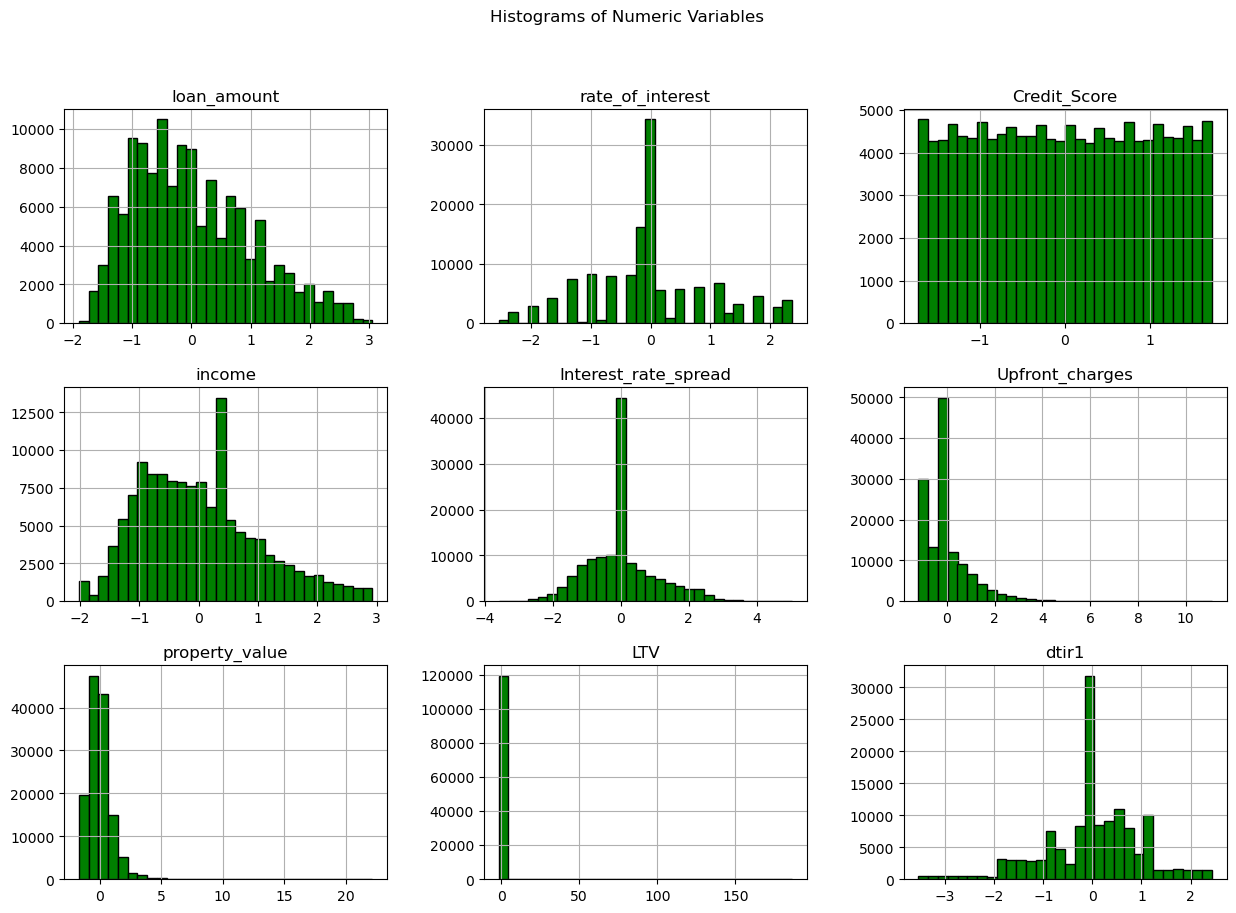

In [21]:
# Histogramas
df_loan[numeric_columns].hist(bins=30, figsize=(15, 10), color='green', edgecolor='black')
plt.suptitle('Histograms of Numeric Variables')
plt.show()

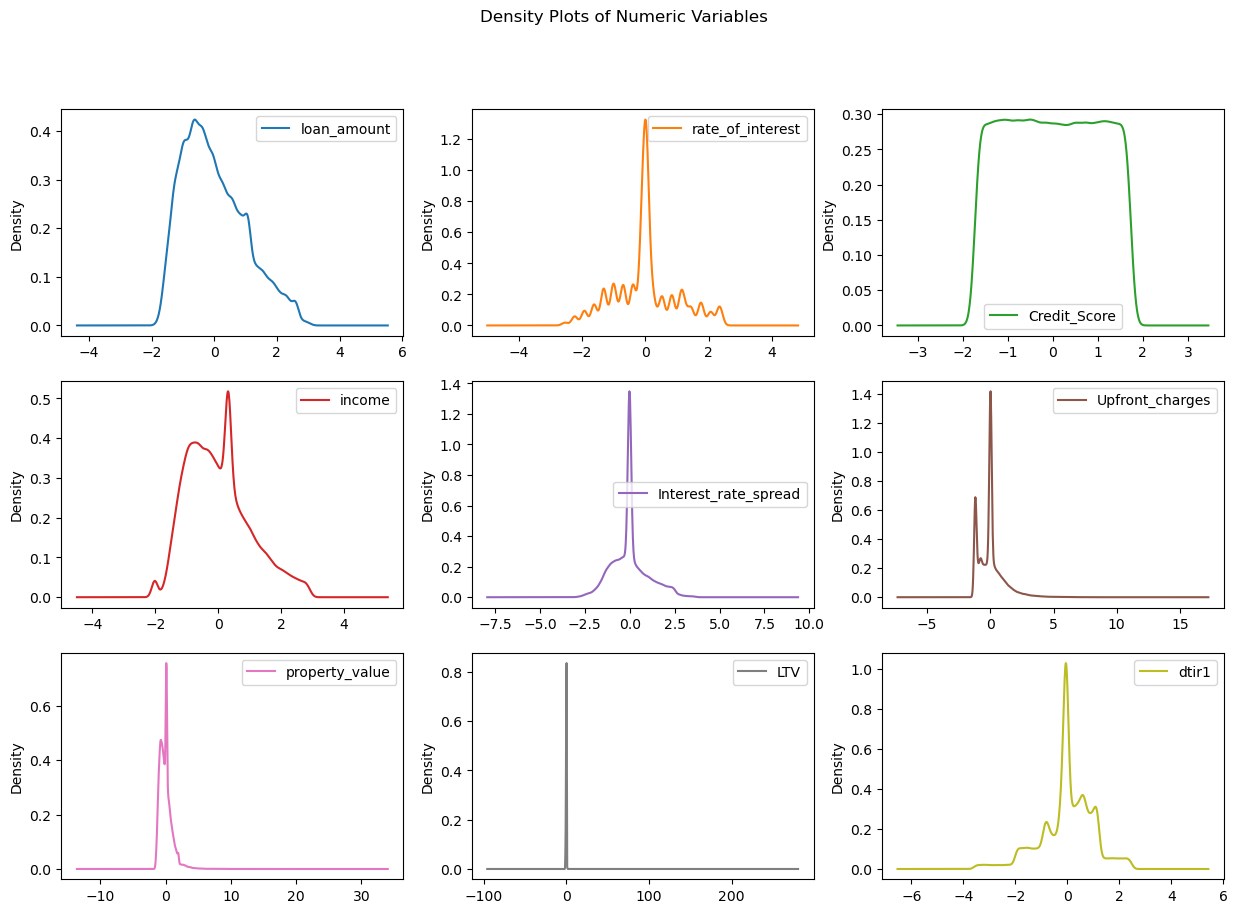

In [22]:
#Gráficos de densidad
df_loan[numeric_columns].plot(kind='density', subplots=True, layout=(3, 3), sharex=False, figsize=(15, 10))
plt.suptitle('Density Plots of Numeric Variables')
plt.show()

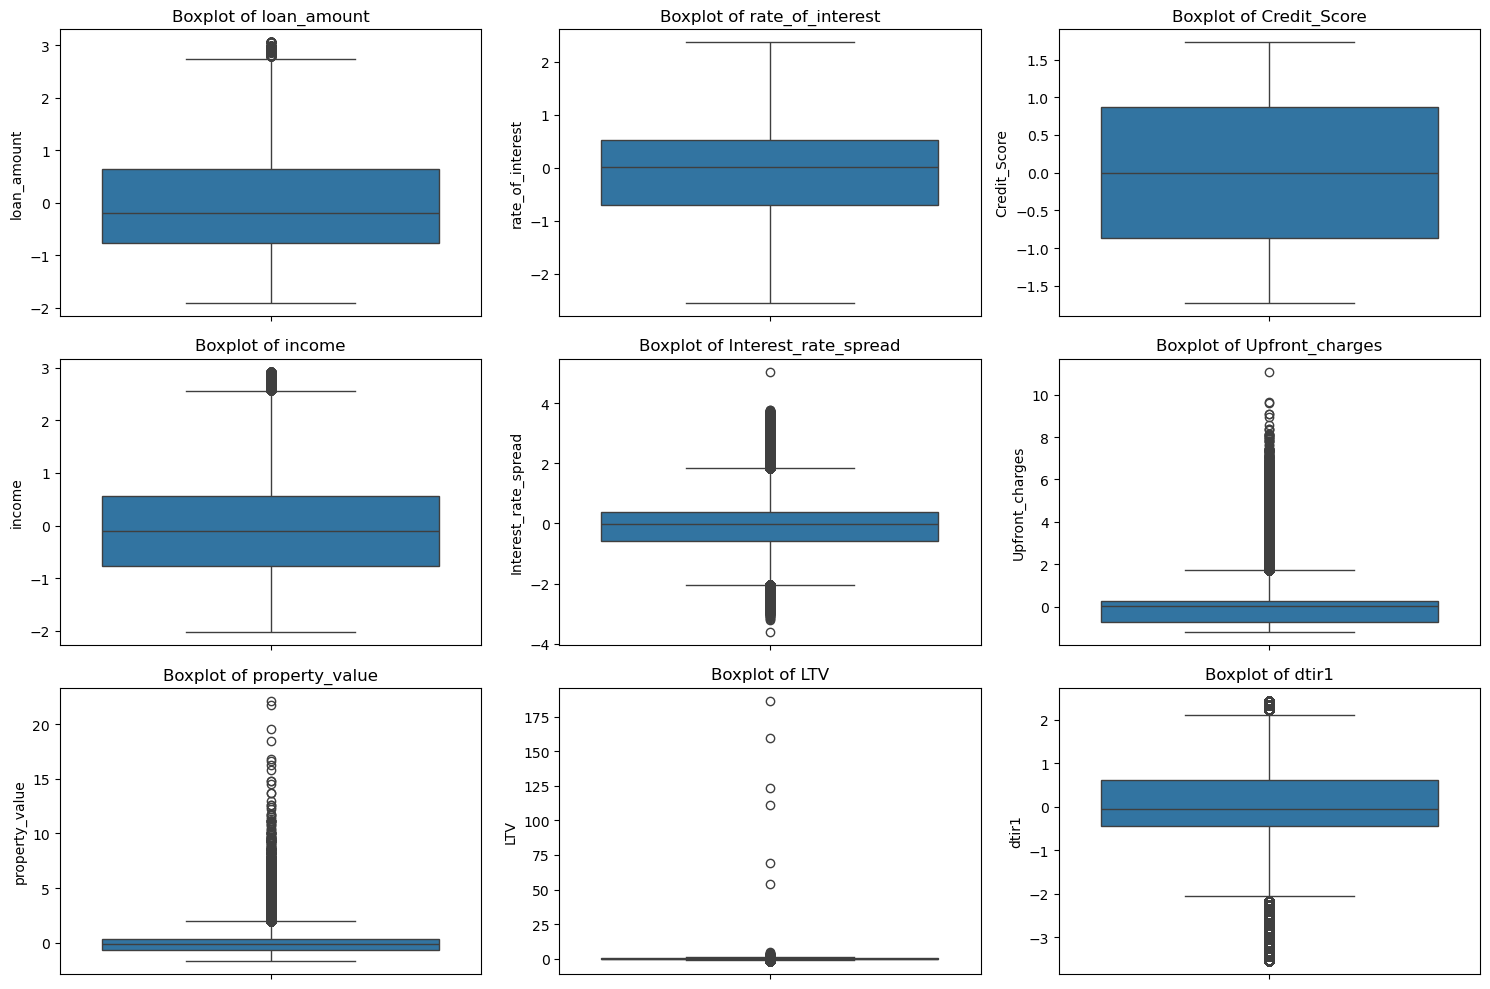

In [23]:
#Boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(df_loan[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

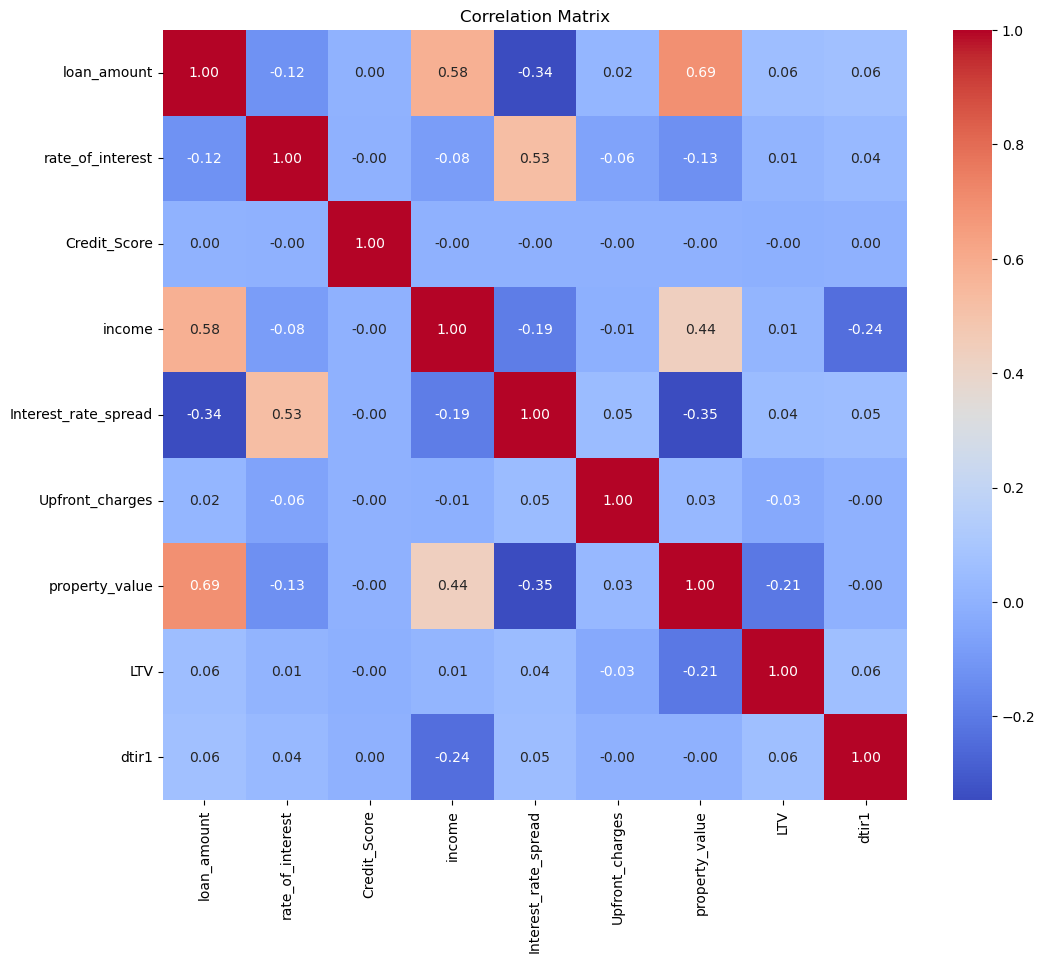

In [24]:
#Matriz de correlación
correlation_matrix = df_loan[numeric_columns].corr()

#Heatmap de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

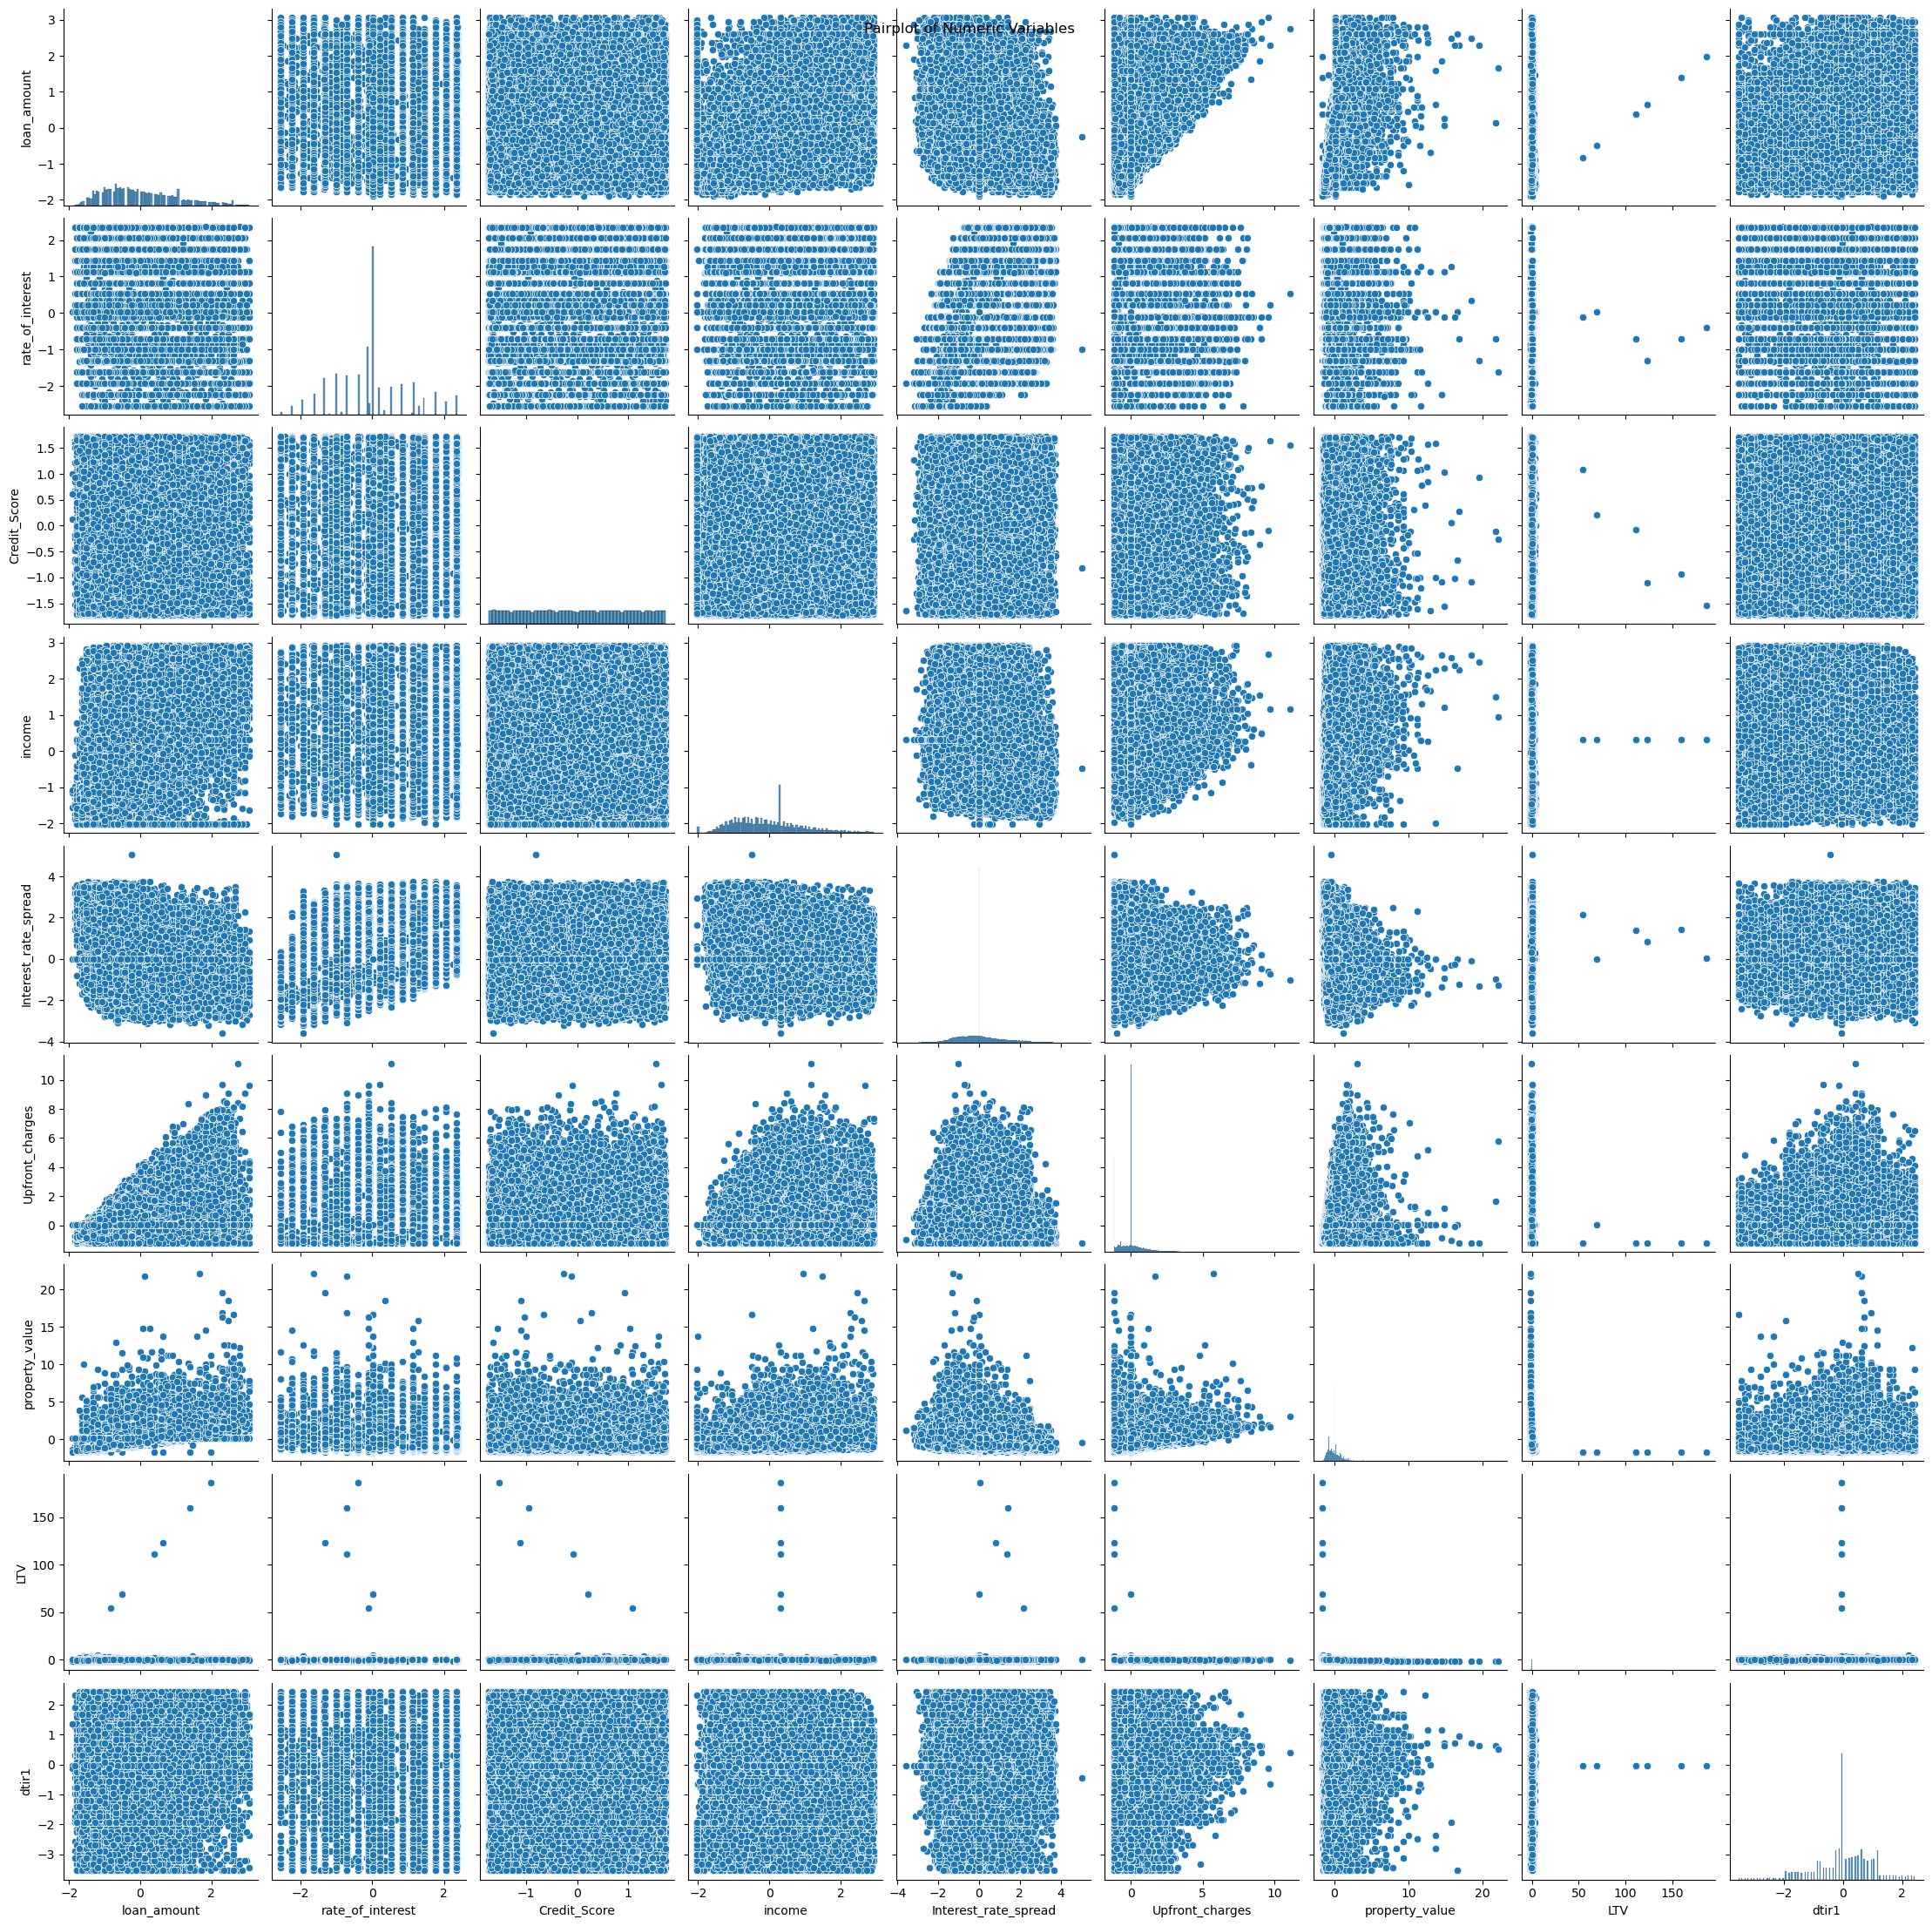

In [25]:
#Pares de variables
sns.pairplot(df_loan[numeric_columns])
plt.suptitle('Pairplot of Numeric Variables')
plt.show()

In [ ]:
#Insights Iniciales

In [ ]:
#Distribuciones: la mayoría de las variables numéricas tienen distribuciones sesgadas, con algunas variables mostrando valores 
#atípicos significativos. loan_amount y income presentan una fuerte asimetría a la derecha.
#Relaciones entre Variables: loan_amount y property_value tienen una correlación positiva alta (0.73), sugiriendo que el valor de 
#la propiedad influye fuertemente en el monto del préstamo. rate_of_interest y Interest_rate_spread también muestran una correlación 
#positiva significativa (0.61).
#Valores Atípicos: Los boxplots revelan varios valores atípicos en variables como loan_amount, rate_of_interest e income, 
#que deben ser considerados en el análisis.
#Correlaciones: La matriz de correlación resalta relaciones significativas entre ciertas variables, como se mencionó anteriormente, 
#lo que puede guiar la selección de características para el modelado.

In [ ]:
#Ingeniería de características
#Feature engineering para crear nuevas características 

In [26]:
#Ratios y Proporciones
df_loan['loan_to_property_value'] = df_loan['loan_amount'] / df_loan['property_value']
df_loan['income_to_loan_amount'] = df_loan['income'] / df_loan['loan_amount']
df_loan['income_to_rate_of_interest'] = df_loan['income'] / df_loan['rate_of_interest']

#Interacciones entre Variables
df_loan['loan_interest_product'] = df_loan['loan_amount'] * df_loan['rate_of_interest']
df_loan['credit_income_product'] = df_loan['Credit_Score'] * df_loan['income']

#Características Binarias y de Categorías
df_loan['high_income'] = df_loan['income'] > df_loan['income'].median()
df_loan['rate_of_interest_category'] = pd.cut(df_loan['rate_of_interest'], bins=[0, 3, 5, 7, float('inf')], labels=['Low', 'Medium', 'High', 'Very High'])

#Limpiar valores negativos o cero antes de aplicar la transformación logarítmica
df_loan['loan_amount'] = df_loan['loan_amount'].apply(lambda x: x if x > 0 else 1)
df_loan['income'] = df_loan['income'].apply(lambda x: x if x > 0 else 1)

#Transformaciones de Características
df_loan['log_loan_amount'] = np.log1p(df_loan['loan_amount'])
df_loan['log_income'] = np.log1p(df_loan['income'])

#Convertir características categóricas en variables dummy
df_loan = pd.get_dummies(df_loan, columns=['rate_of_interest_category'], drop_first=True)

#Verificar la forma del DataFrame después de agregar las nuevas características
print("Forma del DataFrame después de agregar nuevas características:", df_loan.shape)

#Verificar las primeras filas del DataFrame
df_loan.head()

Forma del DataFrame después de agregar nuevas características: (133590, 83)


ID  year  loan_amount  rate_of_interest  Interest_rate_spread  \
0  24890  2019     1.000000          0.022801             -0.013173   
1  24891  2019     1.000000          0.022801             -0.013173   
2  24892  2019     0.578375          1.285079             -0.596544   
3  24893  2019     0.896308          0.524559              0.564619   
4  24894  2019     2.422386         -0.088764             -0.344999   

   Upfront_charges   term  property_value    income  Credit_Score  ...  \
0         0.009000  360.0       -1.283988  1.000000      0.502959  ...   
1         0.009000  360.0        0.108533  1.000000     -1.274489  ...   
2        -0.976058  360.0        0.145579  1.169360      1.158717  ...   
3         0.009000  360.0        0.695413  1.976894     -0.972496  ...   
4        -1.198913  360.0        1.061969  1.492374     -0.843070  ...   

   income_to_loan_amount  income_to_rate_of_interest  loan_interest_product  \
0               1.133765                  -62.932885              -0.028858   
1               0.497239                  -15.120566              -0.015809   
2               2.021804                    0.909952               0.743257   
3               2.205597                    3.768681               0.470166   
4               0.616076                  -16.812752              -0.215022   

   credit_income_product  high_income  log_loan_amount  log_income  \
0              -0.721713        False         0.693147    0.693147   
1               0.439399        False         0.693147    0.693147   
2               1.354957         True         0.456396    0.774432   
3              -1.922521         True         0.639909    1.090880   
4              -1.258175         True         1.230338    0.913236   

   rate_of_interest_category_Medium  rate_of_interest_category_High  \
0                             False                           False   
1                             False                           False   
2                             False                           False   
3                             False                           False   
4                             False                           False   

   rate_of_interest_category_Very High  
0                                False  
1                                False  
2                                False  
3                                False  
4                                False  

[5 rows x 83 columns]

In [ ]:
#Descripción de las Nuevas Características
#loan_to_property_value: Relación entre el monto del préstamo y el valor de la propiedad.
#income_to_loan_amount: Relación entre el ingreso y el monto del préstamo.
#income_to_rate_of_interest: Relación entre el ingreso y la tasa de interés.
#loan_interest_product: Producto del monto del préstamo y la tasa de interés.
#credit_income_product: Producto del puntaje de crédito y el ingreso.
#high_income: Característica binaria que indica si el ingreso es mayor que la mediana del ingreso.
#rate_of_interest_category: Categorías de la tasa de interés divididas en "Low", "Medium", "High" y "Very High".
#log_loan_amount: Transformación logarítmica del monto del préstamo.
#log_income: Transformación logarítmica del ingreso.

In [ ]:
#Conclusiones
#El DataFrame fue limpiado adecuadamente, con valores nulos llenados utilizando la media para las columnas numéricas y la moda para las 
#categóricas. La eliminación de duplicados y el manejo de valores atípicos mejoraron la integridad y calidad del dataset.
#La distribución del monto de los préstamos (loan_amount) muestra que la mayoría de los préstamos son relativamente pequeños, 
#pero hay una cantidad significativa de préstamos grandes que podrían influir en las estadísticas y análisis posteriores.
#Las tasas de interés (rate_of_interest) tienen una distribución centrada en torno al 4%, lo que sugiere una política de tasas bastante 
#uniforme con algunas excepciones.
#Los puntajes de crédito (Credit_Score) están uniformemente distribuidos entre 500 y 850, indicando una variedad en la solvencia crediticia
#de los prestatarios.
#Los ingresos (income) presentan una fuerte asimetría, con la mayoría de los valores siendo relativamente bajos pero con algunos ingresos 
#extremadamente altos.
#La fuerte correlación entre el monto del préstamo (loan_amount) y el valor de la propiedad (property_value) sugiere que el valor de la 
#propiedad es un determinante crucial para el monto del préstamo aprobado.
#La correlación moderada entre la tasa de interés (rate_of_interest) y la dispersión de la tasa de interés (Interest_rate_spread) indica 
#que las tasas de interés más altas están asociadas con una mayor variabilidad, lo cual podría reflejar diferentes perfiles de riesgo o 
#estrategias de precios.
#Las nuevas características creadas, como loan_to_property_value y income_to_loan_amount, proporcionan ratios importantes que podrían ayudar
#a capturar relaciones más complejas entre las variables y mejorar el rendimiento del modelo predictivo.
#Las transformaciones logarítmicas aplicadas a loan_amount e income han ayudado a reducir el sesgo en estas variables, lo que podría mejorar
#la eficacia de los modelos de aprendizaje automático.
#La creación de variables binarias y categóricas, como high_income y rate_of_interest_category, permite capturar mejor las características 
#no lineales y las interacciones entre variables.
#Las características derivadas y transformadas mediante ingeniería de características tienen el potencial de mejorar significativamente el 
#rendimiento de los modelos predictivos al proporcionar información más detallada y relevante sobre las relaciones entre las variables.
#Los valores atípicos, aunque manejados, todavía pueden influir en los modelos, y es recomendable considerar técnicas robustas a estos 
#valores o realizar una evaluación continua de su impacto.